<a href="https://colab.research.google.com/github/MuhammadBilall/Data-Science/blob/master/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [0]:
def DTreeGridSearchAndCV (X, Y):
    depth = []
    for i in range(3,20):
        clf = tree.DecisionTreeClassifier(max_depth=i)
        # Perform 10-fold cross validation 
        scores = cross_val_score(estimator=clf, X=X, y=Y, cv=10, n_jobs=4)
        depth.append((i,scores.mean()*100))
    print(depth)

In [0]:
def RandomForestAndCV (X, Y):
    randomforest = RandomForestClassifier(n_estimators=100)
    randomforest.fit(X, Y)
    RandomForest_CV_Score = cross_val_score(randomforest, X, Y, cv=10)
    print(RandomForest_CV_Score)
    print("Mean Score: ", RandomForest_CV_Score.mean())
    

In [0]:
def DataSplitingForKFold(X, Y, dataset):
    bins = StratifiedKFold(n_splits = 10)
    for train_index, test_index in bins.split(X,Y):
        #print(test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        training_data, testing_data = dataset.iloc[train_index], dataset.iloc[test_index]
    return X_train, Y_train, X_test, Y_test, training_data, testing_data

In [0]:
def ElbowAndSilhoutte(data):
    inertiaS = []
    for k in range(2,11):
        km = KMeans(n_clusters = k)
        #print(km.inertia_)
        cluster_labels = km.fit_predict(data)
        inertiaS.append(km.inertia_)
        avg_score = silhouette_score(data, cluster_labels)
        print("For n_clusters =", k, "The average silhouette_score is :", avg_score)
    
    plt.plot(range(2, 11), inertiaS)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [0]:
def RunKNN(X, Y):
    km = KMeans(n_clusters = 2, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    cluster_labels = km.fit_predict(X)
    for a,b,c in zip(X, cluster_labels , Y):
        print(a, "cluster = ", b, "labels =", c) 
    return km

In [7]:
#Reading the forst data set
dataIncome = pd.read_csv("/content/Datasets_for_CE888/income_evaluation.csv")
income_count = Counter(dataIncome['income>50k'])
print("\nDataSet 3\nImbalance: ", (income_count[0]/(income_count[0]+income_count[1]))*100, "%")
print(income_count)


DataSet 3
Imbalance:  75.91904425539757 %
Counter({0: 24720, 1: 7841})


In [0]:
#Encoding categorical variables in dataSet
encoder2 = LabelEncoder()
dataIncome['workclass'] = encoder2.fit_transform(dataIncome['workclass'])
encoder3 = LabelEncoder()
dataIncome['fnlwgt'] = encoder3.fit_transform(dataIncome['fnlwgt'])
encoder4 = LabelEncoder()
dataIncome['education'] = encoder4.fit_transform(dataIncome['education'])
encoder5 = LabelEncoder()
dataIncome['marital-status'] = encoder5.fit_transform(dataIncome['marital-status'])
encoder6 = LabelEncoder()
dataIncome['occupation'] = encoder6.fit_transform(dataIncome['occupation'])
encoder7 = LabelEncoder()
dataIncome['relationship'] = encoder7.fit_transform(dataIncome['relationship'])
encoder8 = LabelEncoder()
dataIncome['race'] = encoder8.fit_transform(dataIncome['race'])
encoder9 = LabelEncoder()
dataIncome['sex'] = encoder9.fit_transform(dataIncome['sex'])
encoder10 = LabelEncoder()
dataIncome['native-country'] = encoder10.fit_transform(dataIncome['native-country'])


In [0]:
#Splitting the dependant and independant variables
X = dataIncome.iloc[:, 0:13]
Y = dataIncome.iloc[:, -1]

In [10]:
DTreeGridSearchAndCV(X,Y)
#Hence we can achieve around 85% accuracy using a decision tree if we set max depth of the tree from 5-13

[(3, 83.98700606291948), (4, 84.48146083393245), (5, 85.0649838299516), (6, 85.28303808316092), (7, 85.55943765799462), (8, 85.45809667931252), (9, 85.24309764868562), (10, 85.35673118341218), (11, 85.43657244762557), (12, 85.35059150617947), (13, 84.9359921439289), (14, 84.50296903513055), (15, 84.12521150815593), (16, 83.7075437217439), (17, 83.50483724716146), (18, 83.01959057754267), (19, 82.67868337257346)]


In [11]:
RandomForestAndCV(X,Y)
#Hence around 85% accuracy

[0.84986184 0.86179361 0.8519656  0.8519656  0.85933661 0.85380835
 0.85718673 0.86517199 0.86578624 0.85257985]
Mean Score:  0.8569456430640037





***Iteration Number:  1  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9226849938872985
For n_clusters = 3 The average silhouette_score is : 0.5635422359177737
For n_clusters = 4 The average silhouette_score is : 0.5066220891511514
For n_clusters = 5 The average silhouette_score is : 0.5388207117060513
For n_clusters = 6 The average silhouette_score is : 0.5135914542923034
For n_clusters = 7 The average silhouette_score is : 0.4912800441564252
For n_clusters = 8 The average silhouette_score is : 0.4986353921129321
For n_clusters = 9 The average silhouette_score is : 0.5123770228949486
For n_clusters = 10 The average silhouette_score is : 0.498278579695868


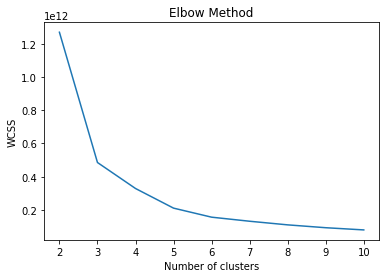

age cluster =  0 labels = 1
workclass cluster =  1 labels = 1
fnlwgt cluster =  0 labels = 1
education cluster =  0 labels = 1
 education-num cluster =  0 labels = 1
marital-status cluster =  0 labels = 1
occupation cluster =  0 labels = 1
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 1
total num minority class samples in cluster(0): 12
total num minority class samples in cluster(1): 1
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  2  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9228554437792359
For n_clusters = 3 The average silhouette_score is : 0.5635959366680443
For n_clusters = 4 The average silhouette_score is : 0.5072301029011801
For n_clusters = 5 The average silhouette_score is : 0.5393327435552638
For n_clusters = 6 The average silhouette_score is : 0.5126501611587775
For n_clus

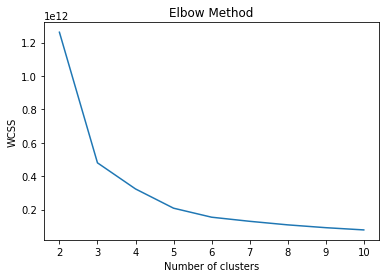

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 1 0 ... 0 0 0]



***Iteration Number:  3  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9225855854324633
For n_clusters = 3 The average silhouette_score is : 0.5636245236345296
For n_clusters = 4 The average silhouette_score is : 0.5082706241517116
For n_clusters = 5 The average silhouette_score is : 0.540926390420318
For n_clusters = 6 The average silhouette_score is : 0.5148278259533712
For n_cluste

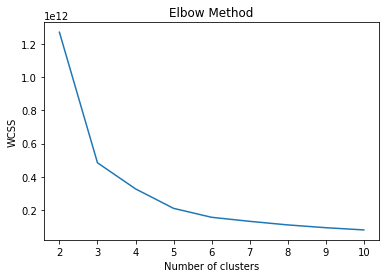

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  4  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.922560572518861
For n_clusters = 3 The average silhouette_score is : 0.5631766509771702
For n_clusters = 4 The average silhouette_score is : 0.5076387485577794
For n_clusters = 5 The average silhouette_score is : 0.5402962345251844
For n_clusters = 6 The average silhouette_score is : 0.5139925038988661
For n_cluste

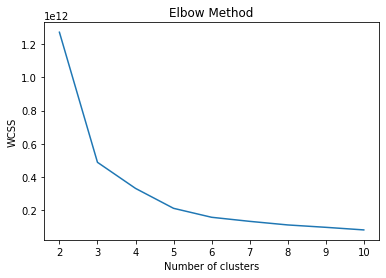

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  5  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9226394286615139
For n_clusters = 3 The average silhouette_score is : 0.5637592949133068
For n_clusters = 4 The average silhouette_score is : 0.5075831623657858
For n_clusters = 5 The average silhouette_score is : 0.5399510395463378
For n_clusters = 6 The average silhouette_score is : 0.5122387307536411
For n_clust

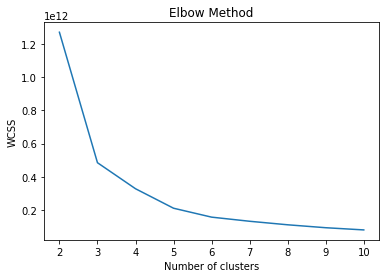

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  6  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9226124447334031
For n_clusters = 3 The average silhouette_score is : 0.5636973017221736
For n_clusters = 4 The average silhouette_score is : 0.5090574218863985
For n_clusters = 5 The average silhouette_score is : 0.5415696295575215
For n_clusters = 6 The average silhouette_score is : 0.5132515862611585
For n_clust

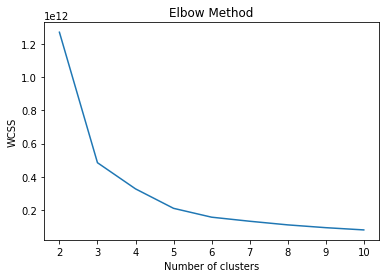

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  7  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9226362174542604
For n_clusters = 3 The average silhouette_score is : 0.5647804659449414
For n_clusters = 4 The average silhouette_score is : 0.5075833495418661
For n_clusters = 5 The average silhouette_score is : 0.5403458791886896
For n_clusters = 6 The average silhouette_score is : 0.5122016100503286
For n_clust

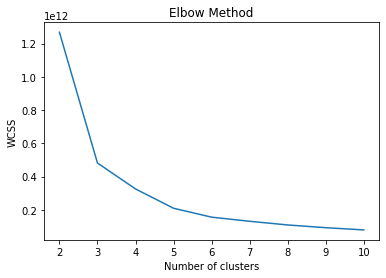

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  8  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9228042775204892
For n_clusters = 3 The average silhouette_score is : 0.5634807205880072
For n_clusters = 4 The average silhouette_score is : 0.5081267303920187
For n_clusters = 5 The average silhouette_score is : 0.54019555278096
For n_clusters = 6 The average silhouette_score is : 0.5134311759733612
For n_cluster

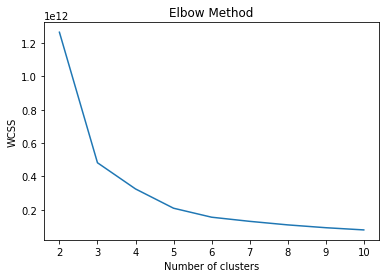

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  9  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9227249770281889
For n_clusters = 3 The average silhouette_score is : 0.5633701174456422
For n_clusters = 4 The average silhouette_score is : 0.5071827490189251
For n_clusters = 5 The average silhouette_score is : 0.5397376467376764
For n_clusters = 6 The average silhouette_score is : 0.5129450306761814
For n_clust

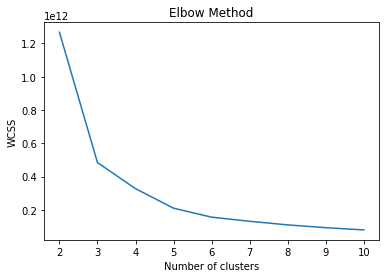

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]



***Iteration Number:  10  K FOLD***

For n_clusters = 2 The average silhouette_score is : 0.9227142435641877
For n_clusters = 3 The average silhouette_score is : 0.5634336861657846
For n_clusters = 4 The average silhouette_score is : 0.5077661082948708
For n_clusters = 5 The average silhouette_score is : 0.5404617931701334
For n_clusters = 6 The average silhouette_score is : 0.513508656256406
For n_clust

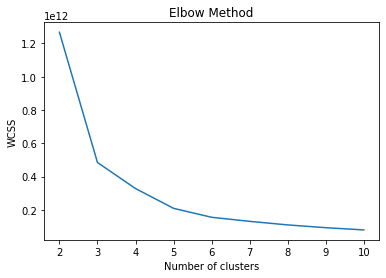

age cluster =  0 labels = 0
workclass cluster =  0 labels = 0
fnlwgt cluster =  0 labels = 0
education cluster =  0 labels = 0
 education-num cluster =  0 labels = 0
marital-status cluster =  0 labels = 0
occupation cluster =  0 labels = 0
relationship cluster =  0 labels = 1
race cluster =  0 labels = 1
sex cluster =  0 labels = 1
capital-gain cluster =  0 labels = 1
 capital-loss cluster =  0 labels = 1
hours-per-week cluster =  0 labels = 0
total num minority class samples in cluster(0): 5
total num minority class samples in cluster(1): 0
Testing on test dataset
[0 0 0 ... 0 0 0]


In [13]:
#Spliting the data into 10 equal portions using stratified K Fold. 
#Using 1 portion for testing and 9 for training.
KfoldNum = 1
bins = StratifiedKFold(n_splits = 10)
for train_index, test_index in bins.split(X,Y):
    #print(test_index)
    print("\n\n\n***Iteration Number: ", KfoldNum, " K FOLD***\n")
    KfoldNum += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    training_data, testing_data = dataIncome.iloc[train_index], dataIncome.iloc[test_index]
    
    #Now finding the ideal number of clusters.
    #Using Elbow Method and Silhoutte analysis
    ElbowAndSilhoutte(X_train)
    #Hence according to Elbow method and silhoutte analysis, the ideal number of clusters should be 2.

    #Running K-means on the selected number of clusters, i.e: 2
    km = RunKNN(X_train, Y_train)

    #storing cluster number and respective centroids with number of samples
    label0 = np.array([]) # cluster 0 with minority class
    label1 = np.array([])# cluster 1 with minority class
    count0 = 0
    count1 = 0
    numOfLabels0 = 0
    numOfLabels1 = 0
    for cluster,centroid,labels in zip(km.labels_,X_train,Y_train):
        if(cluster==0 and labels == 1):
            count0 = count0 + 1
            label0 = np.append(label0 ,[centroid,"cluster",cluster,'labels',labels])
            numOfLabels0 = count0
    
        elif(cluster==1 and labels == 1):
            count1 = count1 + 1
            label1 = np.append(label1 ,[centroid,"cluster",cluster,'labels',labels])
            numOfLabels1 = count1
        
    print('total num minority class samples in cluster(0):',numOfLabels0)
    print('total num minority class samples in cluster(1):',numOfLabels1)


    #getting each cluster as a whole to train random forest for each cluster data
    temp1 = np.array([])
    temp2 = np.array([])
    temp3 = np.array([])
    temp4 = np.array([])
    for cluster,centroid,labels in zip(km.labels_,X_train,Y_train):
        if(cluster==0):
            temp1 = np.append(temp1 ,centroid)#centrid of cluster 1
            temp2 = np.append(temp2,labels)#labells of cluster 1
        
        elif(cluster==1):
            temp3 = np.append(temp3 ,centroid)#centroid of cluster 2
            temp4 = np.append(temp4 ,labels)#label of cluster 2
      
    #cluster 1
    clust1_train = temp1
    clust1_label = temp2  
    #cluster 2
    clust2_train = temp3
    clust2_label = temp4
    if (clust1_train.size > 0 & clust2_train.size > 0):
            
        clust1_train = np.reshape(clust1_train,(-1,12)) # cluster 1
        print(clust1_train)
        print(clust1_train.shape)
        
        clust2_train = np.reshape(clust2_train,(-1,12)) # cluster 2
        print(clust2_train)
        print(clust2_train.shape)
    
        #Training random forest model for each clusters if the cluster is not empty of minority class
        #cluster 1
        rd_clf_1 = RandomForestClassifier(random_state=22, n_estimators= 100)
        rd_clf_1.fit(clust1_train, clust1_label)

        #cluster 2
        rd_clf_2 = RandomForestClassifier(random_state=22, n_estimators= 100)
        rd_clf_2.fit(clust2_train, clust2_label)
    
    #Finally testing the cluster
    print("Testing on test dataset")
    CLUSTER_TEST = km.predict(X_test)
    print(CLUSTER_TEST) # this is the cluster number  of X Test bin
